In [1]:
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\georg\anaconda3\envs\course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
import seaborn as sns
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [35]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

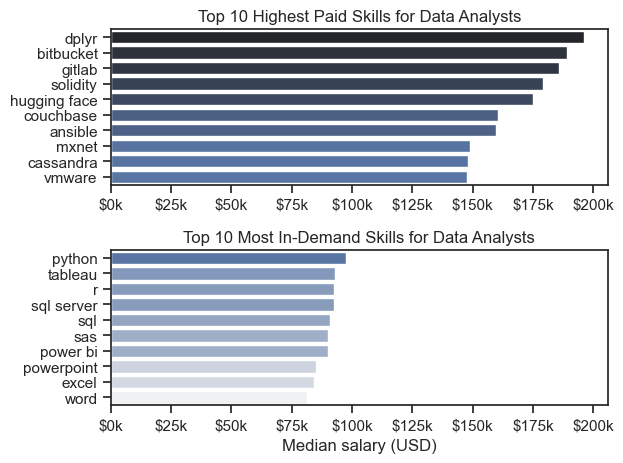

In [36]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0],hue='median',palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))

sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
ax[1].set_xlim(ax[0].get_xlim()) 

fig.tight_layout()

Text(12.444444444444445, 0.5, 'Number of jobs')

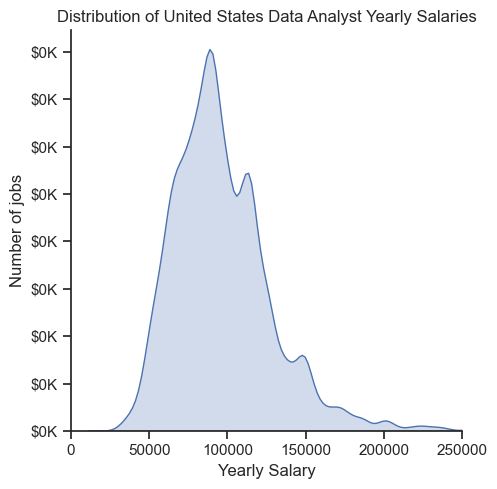

In [41]:
sns.displot(data=df_DA_US.salary_year_avg,kind='kde',fill=True)
plt.xlim(0,250_000)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')

In [42]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

job_list = [df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

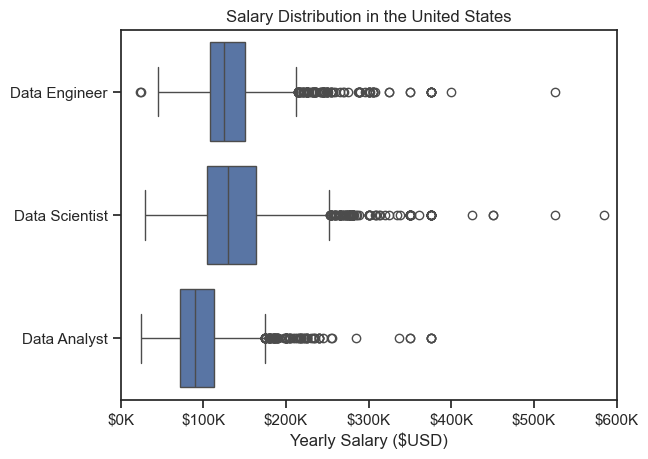

In [46]:
sns.boxplot(data=df_us,x='salary_year_avg',y='job_title_short')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600_000)
plt.show()